In [3]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../../src')

In [18]:
import pandas as pd
import numpy as np

from darts.models import CatBoostModel
from darts.datasets import AirPassengersDataset, AusBeerDataset, AustralianTourismDataset
from darts.utils.statistics import extract_trend_and_seasonality, check_seasonality

import ontime as on

## Load test data

In [20]:
s0 = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))
s1 = AirPassengersDataset().load()
s2 = AusBeerDataset().load()
s3 = AustralianTourismDataset().load()

## Check seasonanlity

In [23]:
print(check_seasonality(s0))
print(check_seasonality(s1))
print(check_seasonality(s2))

(False, 0)
(True, 12)
(True, 4)


## Infer frequency

In [28]:
s0.pd_dataframe()

component,random_walk
time,
2022-01-01,0.299873
2022-01-02,1.850754
2022-01-03,1.961474
2022-01-04,1.990435
2022-01-05,1.880259
...,...
2022-12-27,0.639464
2022-12-28,-1.527072
2022-12-29,-2.085626


In [37]:
print(pd.infer_freq(s0.pd_dataframe().index))
print(pd.infer_freq(s1.pd_dataframe().index))
print(pd.infer_freq(s2.pd_dataframe().index))

D
MS
QS-OCT


In [44]:
s1.freq

<MonthBegin>

<Axes: xlabel='Month'>

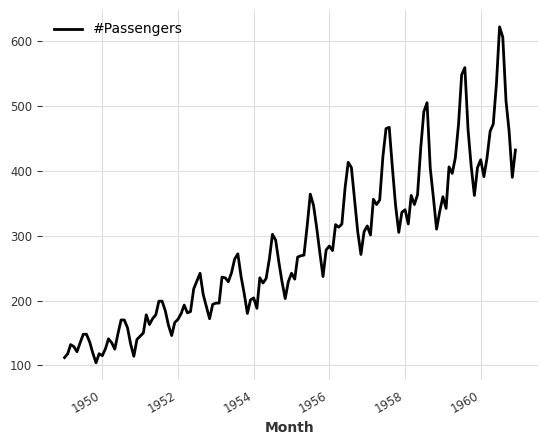

In [58]:
s1.plot()

In [145]:
def get_number_of_containing_entries(freq_1, freq_2):
    # Create date range objects
    start_date='2000-01-01'
    end_date='2010-01-01'
    range_1 = pd.date_range(start=start_date, end=end_date, freq=freq_1)
    range_2 = pd.date_range(start=start_date, end=end_date, freq=freq_2)

    # Calculate number of containing entries
    if len(range_1) < len(range_2):
        res = len(range_2) / len(range_1)
    else : 
        res = len(range_1) / len(range_2)
    
    return round(res)


class GenericPredictor:

    def __init__(self):
        pass

    def fit(self, ts, **params):
        # Get informations about the time series
        has_seasonality, seasonality = check_seasonality(ts)
        lags = 12 if seasonality == 0 else seasonality
        
        # Create model
        self.model = on.Model(
            CatBoostModel,
            lags=int(lags),
        )
        self.model.fit(ts, **params)
    
    def predict(self, n, **params):
        return self.model.predict(n, **params)


In [144]:
s1.freq > s2.freq

TypeError: '>' not supported between instances of 'pandas._libs.tslibs.offsets.MonthBegin' and 'pandas._libs.tslibs.offsets.QuarterBegin'

In [140]:
get_number_of_containing_entries(s1.freq, '4h')

181

In [158]:
gp = GenericPredictor()
gp.fit(s2)
pred = gp.predict(6)

<Axes: xlabel='date'>

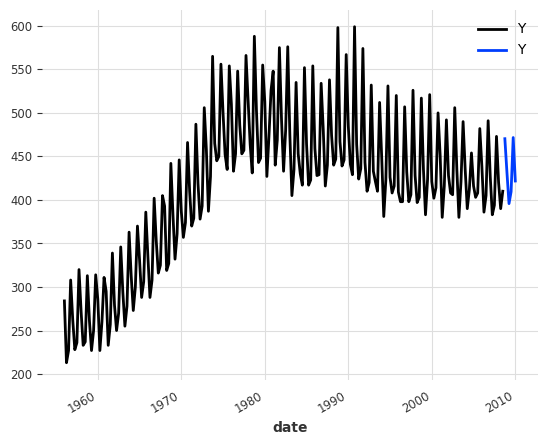

In [159]:
s2.plot()
pred.plot()

<Axes: xlabel='Month'>

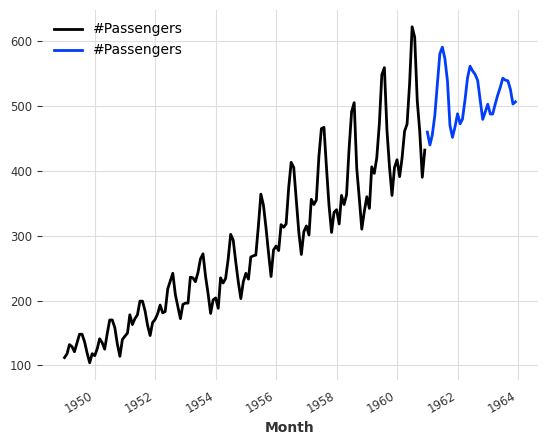

In [153]:
s1.plot()
pred.plot()